## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
Combine_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
Combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Mice_Count = Combine_df["Mouse ID"].count()
Mice_Count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicated_Rows = Combine_df[Combine_df.duplicated(['Mouse ID', 'Timepoint'])]
Duplicated_Rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
All_Duplication = Combine_df[Combine_df.duplicated(['Mouse ID'])]
All_Duplication


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_df = Combine_df.drop_duplicates("Mouse ID")
Cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
Mice_Count_2 = Cleaned_df["Mouse ID"].count()
Mice_Count_2

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
median = Combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mean = Combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
standard_dv = Combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
variance = Combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sem = Combine_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
Summary_Stats_df = pd.DataFrame({"Median": median, "Mean": mean, "Standard Deviation": standard_dv, "Variance": variance, "SEM": sem})
Summary_Stats_df

,Median,Mean,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,4.994774,24.947764,0.329346
Ceftamin,51.776157,52.591172,6.268188,39.290177,0.469821
Infubinol,51.820584,52.884795,6.567243,43.128684,0.492236
Ketapril,53.698743,55.235638,8.279709,68.553577,0.603860
Naftisol,52.509285,54.331565,8.134708,66.173479,0.596466
Placebo,52.288934,54.033581,7.821003,61.168083,0.581331
Propriva,50.854632,52.322552,6.507770,42.351070,0.512884
Ramicane,40.673236,40.216745,4.846308,23.486704,0.320955
Stelasyn,52.431737,54.233149,7.710419,59.450562,0.573111


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Aggrgate Method
Agg_Method = Combine_df.groupby('Drug Regimen')
Agg_Summary = Agg_Method.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
Agg_Summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

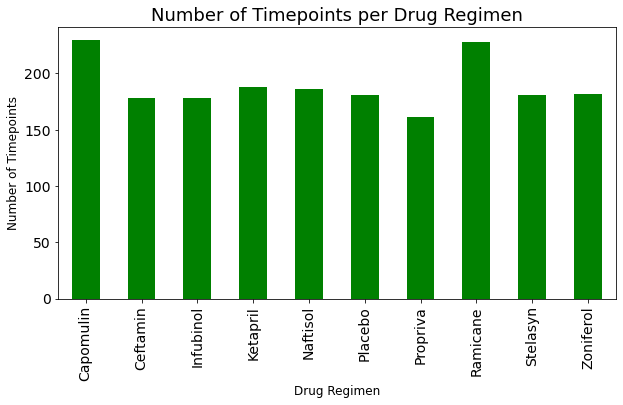

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Timepoints_Per_Mouse = Combine_df.groupby(["Drug Regimen"]).count()["Timepoint"]

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Timepoints",fontsize = 12)
plt.title("Number of Timepoints per Drug Regimen",fontsize = 18)
format = Timepoints_Per_Mouse.plot.bar(figsize=(10,5), color='g',fontsize = 14)
Timepoints_Per_Mouse
plt.show()
Timepoints_Per_Mouse

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# List of Regimens
Drug_Regimens = Summary_Stats_df.index.tolist()
Drug_Regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [11]:
# List of Timepoint Counts
Timepoint_Count = (Combine_df.groupby(["Timepoint"])["Mouse ID"].count()).tolist()
Timepoint_Count

[250, 238, 223, 207, 195, 183, 171, 154, 142, 130]

In [12]:
# X axis
x_axis = np.arange(len(Timepoints_Per_Mouse))

NameError: name 'Text' is not defined

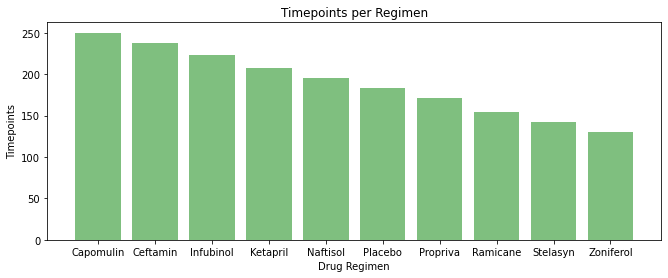

In [13]:
# Create Bar Plot (pyplot)
x_axis = Drug_Regimens

plt.figure(figsize=(11,4))                                
plt.bar(x_axis, Timepoint_Count, color='g', alpha=0.5, align="center")

plt.title("Timepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
Text(0, 1, 'Count')

In [14]:
plt.close()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_df = pd.DataFrame(Combine_df.groupby(["Sex"]).count()).reset_index()
Gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [16]:
# Shrink data to just the things we need
Gender_df = Gender_df[["Sex","Mouse ID"]]
Gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

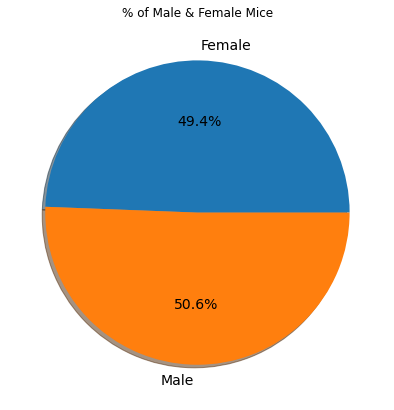

In [17]:
# Plot Pie Chart
plt.figure(figsize=(15,8))
plot = plt.subplot(121, aspect="equal")
Gender_df.plot(kind="pie", y = "Mouse ID", ax=plot, autopct='%1.1f%%', shadow=True, labels=Gender_df["Sex"], legend = False, fontsize=14)

plt.title("% of Male & Female Mice")
plt.xlabel("")
plt.ylabel("")

In [18]:
plt.close()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_df = Gender_df[["Sex","Mouse ID"]]
Gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


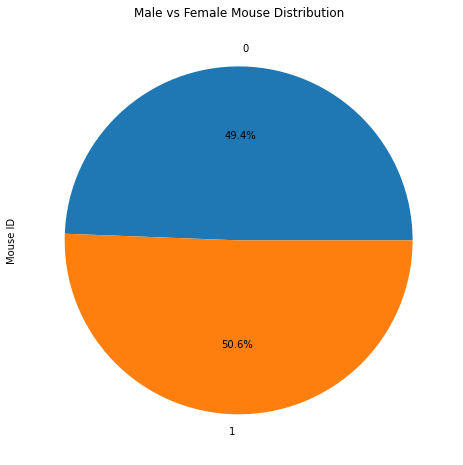

In [24]:
# Format and Plot
Distribution_Pie = Gender_df["Mouse ID"].plot.pie(y='sizes', figsize=(15, 8), autopct="%1.1f%%")
plt.title('Male vs Female Mouse Distribution')

plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_df = Combine_df.loc[Combine_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combine_df.loc[Combine_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Combine_df.loc[Combine_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Combine_df.loc[Combine_df["Drug Regimen"] == "Ceftamin", :]
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [ ]:
#Capomulin

In [34]:
Capomulin_Final = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_Fianl_Volume = pd.DataFrame(Capomulin_Final)
Capomulin_Merge = pd.merge(Capomulin_Fianl_Volume, Combine_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_Merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [37]:
Tumors = Capomulin_Merge["Tumor Volume (mm3)"]

Quartiles = Tumors.quantile([.25,.5,.75])
Lower_Q = Quartiles[0.25]
Upper_Q = Quartiles[0.75]
iqr = Upper_Q-Lower_Q
Lower_Bound = Lower_Q - (1.5*iqr)
Upper_Bound = Upper_Q + (1.5*iqr)
print(f"Capomulin potential outliers are values below {Lower_Bound} and above {Upper_Bound}.")

Capomulin potential outliers are values below 20.70456164999999 and above 51.83201549.


In [29]:
Ramicane_Final = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_Final_Volume = pd.DataFrame(Ramicane_Final)
Ramicane_Merge = pd.merge(Ramicane_Final_Volume, Combine_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_Merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [39]:
Tumors2 = Ramicane_Merge["Tumor Volume (mm3)"]

Quartiles2 = Tumors2.quantile([.25,.5,.75])
Lower_Q2 = Quartiles2[0.25]
Upper_Q2 = Quartiles2[0.75]
iqr2 = Upper_Q2-Lower_Q2
Lower_Bound2 = Lower_Q2 - (1.5*iqr2)
Upper_Bound2 = Upper_Q2 + (1.5*iqr2)
print(f"Ramicane potential outliers are values below {Lower_Bound} and above {Upper_Bound}.")

Ramicane potential outliers are values below 20.70456164999999 and above 51.83201549.


In [40]:
Infubinol_Final = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_Final_Volume = pd.DataFrame(Infubinol_Final)
Infubinol_Merge = pd.merge(Infubinol_Final_Volume, Combine_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_Merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [45]:
Tumors3 = Infubinol_Merge["Tumor Volume (mm3)"]

Quartiles3 = Tumors3.quantile([.25,.5,.75])
Lower_Q3 = Quartiles3[0.25]
Upper_Q3 = Quartiles3[0.75]
iqr3 = Upper_Q3-Lower_Q3
Lower_Bound3 = Lower_Q3 - (1.5*iqr3)
Upper_Bound3 = Upper_Q3 + (1.5*iqr3)
print(f"Infubinol potential outliers are values below {Lower_Bound} and above {Upper_Bound}.")

Infubinol potential outliers are values below 20.70456164999999 and above 51.83201549.


In [32]:
Ceftamin_Final = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_Final_Volume = pd.DataFrame(Ceftamin_Final)
Ceftamin_Merge = pd.merge(Ceftamin_Final_Volume, Combine_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_Merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [46]:
Tumors4 = Ceftamin_Merge["Tumor Volume (mm3)"]

Quartiles4 = Tumors4.quantile([.25,.5,.75])
Lower_Q4 = Quartiles4[0.25]
Upper_Q4 = Quartiles4[0.75]
iqr4 = Upper_Q4-Lower_Q4
Lower_Bound4 = Lower_Q4 - (1.5*iqr4)
Upper_Bound4 = Upper_Q4 + (1.5*iqr4)
print(f"Ceftamin potential outliers are values below {Lower_Bound} and above {Upper_Bound}.")

Ceftamin potential outliers are values below 20.70456164999999 and above 51.83201549.


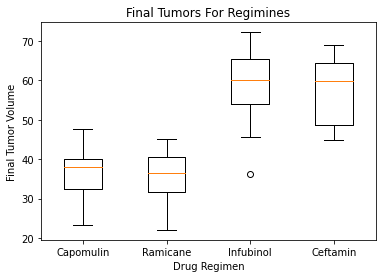

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Box_Plot = [Tumors, Tumors2, Tumors3, Tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumors For Regimines')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(Box_Plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

In [53]:

Individual_Capo_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
Individual_Capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1


## Line and Scatter Plots

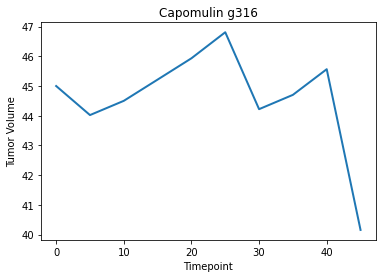

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
X_Axis_Capo = Individual_Capo_df["Timepoint"]
Tumor_Capo = Individual_Capo_df["Tumor Volume (mm3)"]

plt.title('Capomulin g316')
plt.plot(X_Axis_Capo, Tumor_Capo,linewidth=2, markersize=10)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

plt.show()

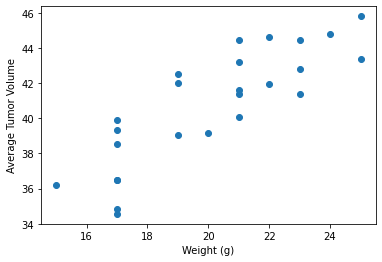

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Avg = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(Capomulin_Avg['Weight (g)'],Capomulin_Avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Correlation=round(st.pearsonr(Capomulin_Avg['Weight (g)'],Capomulin_Avg['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between mouse weight and average tumor volume is {Correlation}")

Correlation between mouse weight and average tumor volume is 0.84


In [67]:
#Linear
Linear_Model=st.linregress(Capomulin_Avg['Weight (g)'],Capomulin_Avg['Tumor Volume (mm3)'])
Linear_Model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [72]:
slope = 0.9544396890241045
intercept = 21.552160532685015

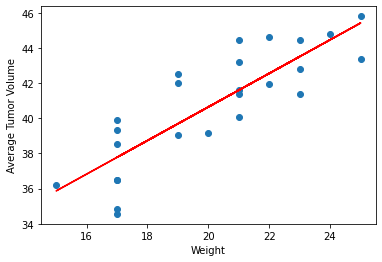

In [75]:
#Plot 
Y_Values = Capomulin_Avg['Weight (g)']*slope + intercept
plt.scatter(Capomulin_Avg['Weight (g)'],Capomulin_Avg['Tumor Volume (mm3)'])
plt.plot(Capomulin_Avg['Weight (g)'],Y_Values,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')

plt.show()